<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/OutlierHandling/OutliersHandling_Trimming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trinming of Outliers - Ways

1. IQR
2. Gaussian Approximation
3. Qunatiles
4. Arbitary Values

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [246]:
from sklearn.datasets import load_boston

In [247]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [249]:
data.isnull().sum()

RM       0
LSTAT    0
CRIM     0
dtype: int64

In [250]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Trimming with IQR

- Outliers (Right) = 75th Quantile + 1.5* IQR
- Outliesr (Left) = 25th Quantile - 1.5 * IQR
- IQR = 75th Quantile - 25th Quantile

In [251]:
from scipy.stats import iqr

In [252]:
labels = ['LSTAT','RM','CRIM']

In [253]:
def trim_iqr(df, labels):

  ini_length = len(df)
  print('\nDistribition of the 1st Variale before Trimming - ','shape :',df.shape,'\n')
  diagnostic_plots(df,labels[0])

  for label in labels:
    pecntile25 = np.percentile((data[label]),25)
    pecntile75 = np.percentile((data[label]),75)

    inter_range = iqr(data[label])

    lower_limit = pecntile25 - 1.5*inter_range
    upper_limit = pecntile25 + 1.5*inter_range

    df = df[~((df[label] > upper_limit) | (df[label] < lower_limit))]
  
  print('\nDistribition of the 1st Variale After Trimming - ','shape :',df.shape,'\n')
  print('Data retained : ', round(len(df)/ini_length,2),'\n')
  diagnostic_plots(df,labels[0])


Distribition of the 1st Variale before Trimming -  shape : (506, 3) 



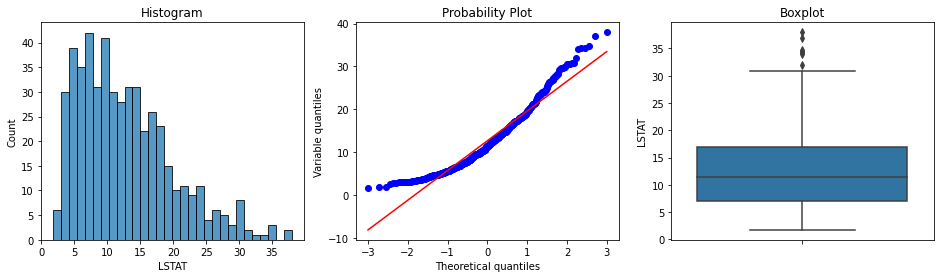


Distribition of the 1st Variale After Trimming -  shape : (323, 3) 

Data retained :  0.64 



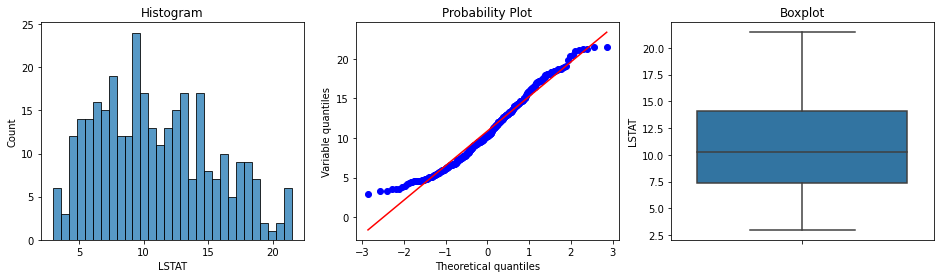

In [254]:
trim_iqr(data,labels)

### Trimming with Gaussian Approximation

Outliers = mean +/- 3*stdev

In [255]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


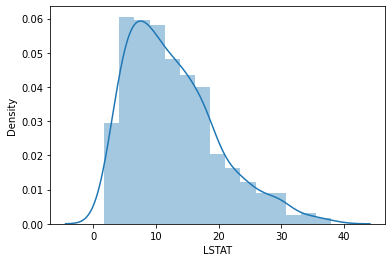

In [257]:
sns.distplot(data['LSTAT'])
plt.show()

In [258]:
def trim_gaussian(df, labels):

  ini_length = len(df)
  print('\nDistribition of the 1st Variale before Trimming - ','shape :',df.shape,'\n')
  diagnostic_plots(df,labels[0])

  for label in labels:
    
    mean_value = np.mean(data[label])
    stdv = np.std(data[label])

    lower_limit = mean_value - 3*stdv
    upper_limit = mean_value + 3*stdv

    df = df[~((df[label] > upper_limit) | (df[label] < lower_limit))]
  
  print('\nDistribition of the 1st Variale After Trimming - ','shape :',df.shape,'\n')
  print('Data retained : ', round(len(df)/ini_length,2),'\n')
  diagnostic_plots(df,labels[0])


Distribition of the 1st Variale before Trimming -  shape : (506, 3) 



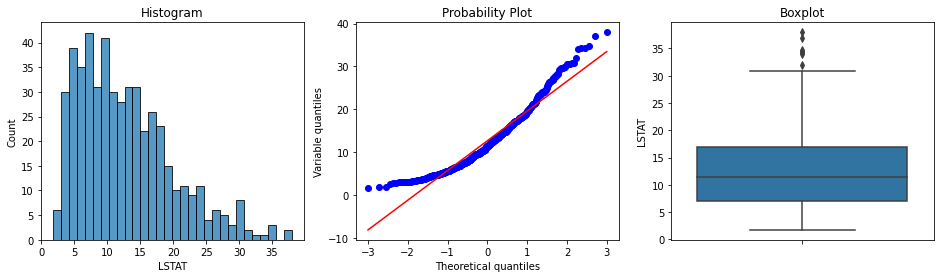


Distribition of the 1st Variale After Trimming -  shape : (487, 3) 

Data retained :  0.96 



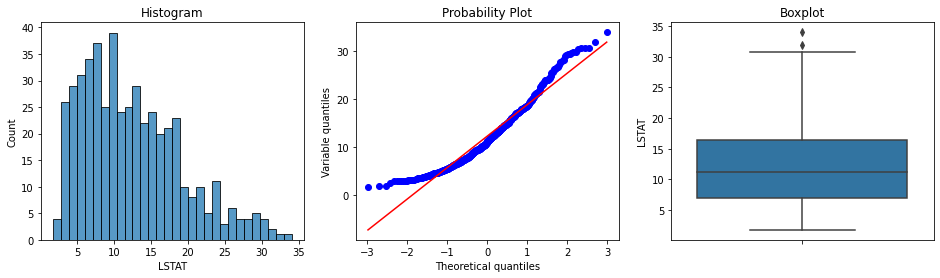

In [259]:
trim_gaussian(data,labels)

### Trimming with quantiles 

- lower limit = 5th quantile
- upper limit = 95th qunatile

In [260]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


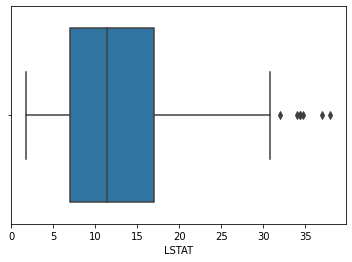

In [262]:
sns.boxplot(data['LSTAT'])
plt.show()

In [263]:
def trim_quantile(df, labels):

  ini_length = len(df)
  print('\nDistribition of the 1st Variale before Trimming - ','shape :',df.shape,'\n')
  diagnostic_plots(df,labels[0])

  for label in labels:

    lower_limit = np.percentile((data[label]),5)
    upper_limit = np.percentile((data[label]),95)

    df = df[~((df[label] > upper_limit) | (df[label] < lower_limit))]
  
  print('\nDistribition of the 1st Variale After Trimming - ','shape :',df.shape,'\n')
  print('Data retained : ', round(len(df)/ini_length,2),'\n')
  diagnostic_plots(df,labels[0])


Distribition of the 1st Variale before Trimming -  shape : (506, 3) 



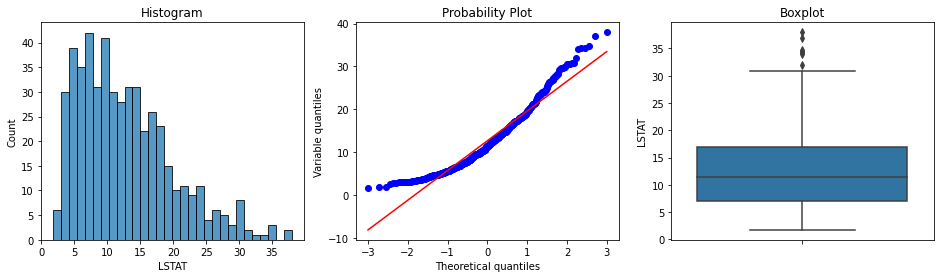


Distribition of the 1st Variale After Trimming -  shape : (395, 3) 

Data retained :  0.78 



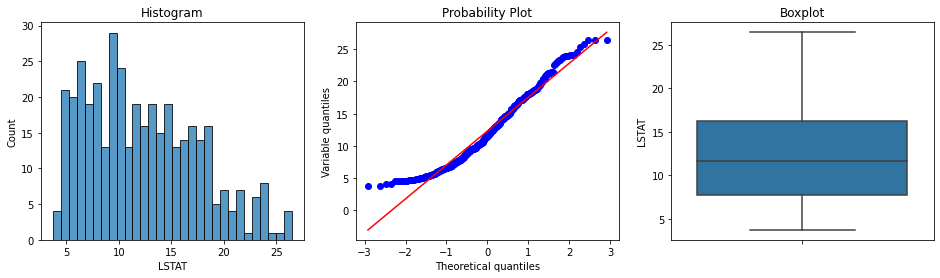

In [264]:
trim_quantile(data,labels)

### Trimming with Arbitrary Values

Manually choosing the upper limit as well as the lower limit of the variables

- Completely based on the problem at hand and the level of the domain knowledge